## Music and Mental Health
## Question: Does listening to music help reduce anxiety?​
- The Music and Mental Health Survey Results dataset was used from Kaggle.​ The information was mainly self reported.

- Exploring how individuals perceive the effects of music on their mental health focusing on anxiety levels.​

- Respondents rank Anxiety, Depression, Insomnia, and OCD on a scale of 0 to 10, where:

    - 0 - I do not experience this.
    - 10 - I experience this extremely.

## Exploratory Data Analysis

- Summarize the data

- Get value counts of a categorical column (Music effects)

- Get histograms of numeric columns

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("mxmh_survey_results.csv")

# Preview first 5 rows
print("First 5 Rows:")
df.head()

First 5 Rows:


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [15]:
# Show column info and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [16]:
# Count values in 'Music effects' (including NaN)

print("Value Counts for 'Music effects':")
print(df["Music effects"].value_counts(dropna=False))

Value Counts for 'Music effects':
Music effects
Improve      542
No effect    169
Worsen        17
NaN            8
Name: count, dtype: int64


Column: Age


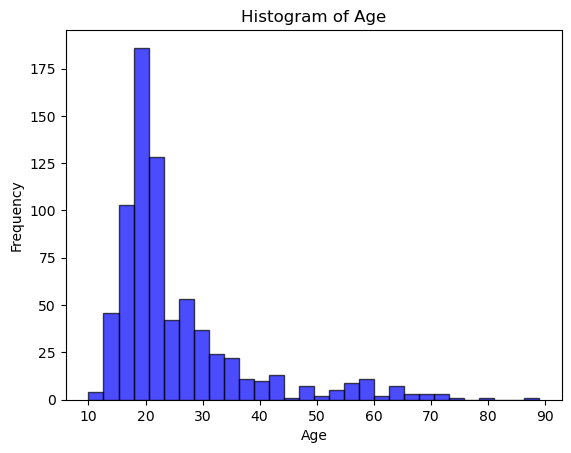

Column: Hours per day


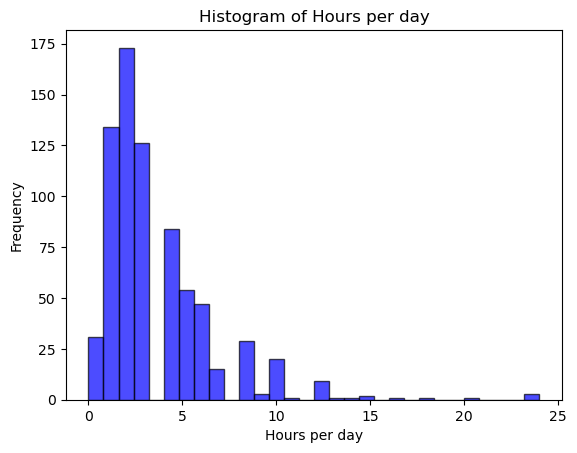

Column: BPM


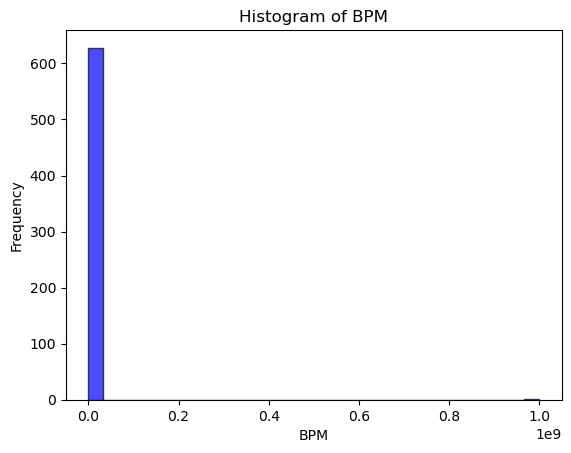

Column: Anxiety


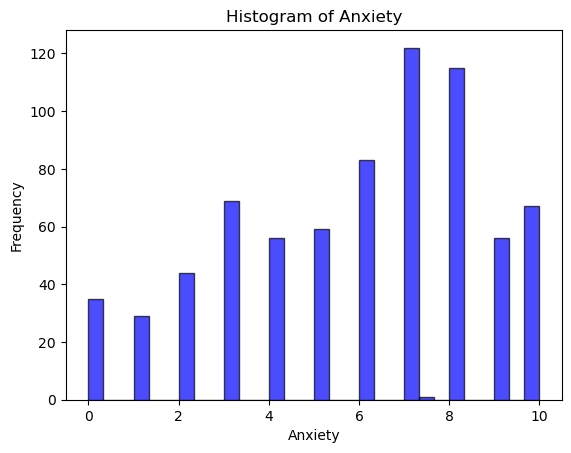

Column: Depression


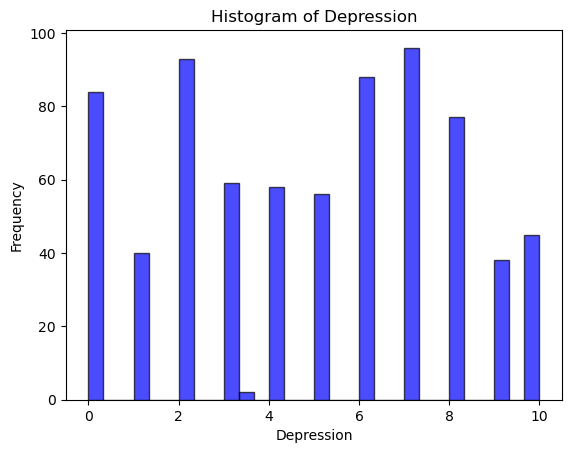

Column: Insomnia


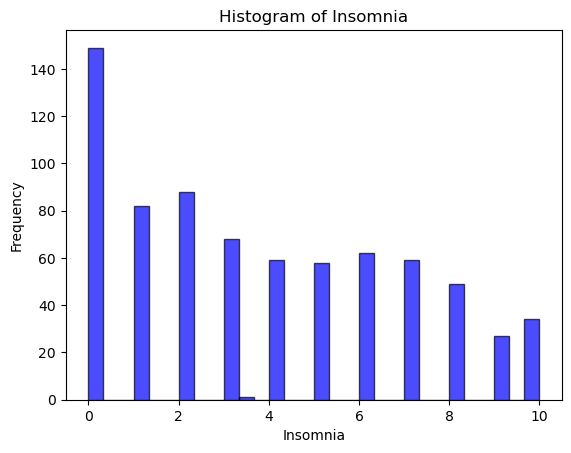

Column: OCD


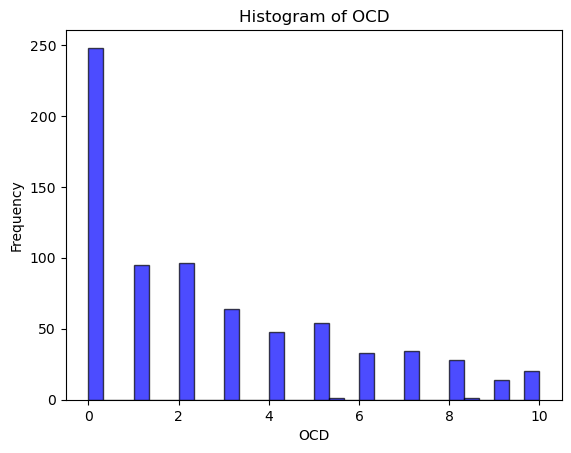

In [17]:
# Plot histograms for each numeric column in the DataFrame

# Get all numeric column names
numeric_columns = df.select_dtypes(include=['number']).columns

for col in numeric_columns:
    print(f"Column: {col}")
    
    df[col].plot.hist(bins=30, color="blue", edgecolor='black', alpha=0.7)
    
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Data Cleaning and Transformation

In [18]:
# Fill NaN values for categorical columns with 'Unknown'
df_cleaned = df.copy()

for col in df_cleaned.select_dtypes(include='object').columns:
    df_cleaned[col] = df_cleaned[col].fillna('Unknown')

In [19]:
# Fill NaN values for numeric columns with the mean
for col in df_cleaned.select_dtypes(include='number').columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())

# Check that there are no more missing values
# print(df_cleaned.isnull().sum())

## Data Joining

- Joining two or more dataframes on their index

In [20]:
# Dataframe for anxiety and music effects
df_music_help = df_cleaned[["Music effects", "Anxiety"]]

df_music_help = df_music_help[df_music_help["Anxiety"] > 5]

df_music_help


,Music effects,Anxiety
1,Unknown,7.0
2,No effect,7.0
3,Improve,9.0
4,Improve,7.0
5,Improve,8.0
...,...,...
726,Improve,9.0
728,Improve,7.0
729,Improve,6.0
730,Improve,7.0


In [21]:
# Data frame for the conditions

df_conditions = df_cleaned[["Anxiety", "Depression", "Insomnia", "OCD"]]

df_conditions

,Anxiety,Depression,Insomnia,OCD
0,3.0,0.0,1.0,0.0
1,7.0,2.0,2.0,1.0
2,7.0,7.0,10.0,2.0
3,9.0,7.0,3.0,3.0
4,7.0,2.0,5.0,9.0
...,...,...,...,...
731,7.0,6.0,0.0,9.0
732,3.0,2.0,2.0,5.0
733,2.0,2.0,2.0,2.0
734,2.0,3.0,2.0,1.0


In [22]:
# Joining two dataframes on their index

joined_df = df_music_help.merge(df_conditions)

print("Merged DataFrame:")
joined_df

Merged DataFrame:


,Music effects,Anxiety,Depression,Insomnia,OCD
0,Unknown,7.0,2.0,2.0,1.0
1,Unknown,7.0,7.0,10.0,2.0
2,Unknown,7.0,2.0,5.0,9.0
3,Unknown,7.0,7.0,4.0,7.0
4,Unknown,7.0,5.0,4.0,1.0
...,...,...,...,...,...
42619,Improve,7.0,8.0,6.0,5.0
42620,Improve,7.0,7.0,5.0,5.0
42621,Improve,7.0,3.0,1.0,2.0
42622,Improve,7.0,6.0,4.0,6.0


##  Aggregation and Grouping Operations
- Perform an aggregation on a groupby

In [23]:
# Group by Music effects and calculate mean anxiety
grouped_anxiety = df_music_help.groupby("Music effects")["Anxiety"].mean()
print("Mean Anxiety by Music Effect:")
print(grouped_anxiety)


Mean Anxiety by Music Effect:
Music effects
Improve      7.736311
No effect    7.878049
Unknown      8.333333
Worsen       8.166667
Name: Anxiety, dtype: float64


## Data Visualization

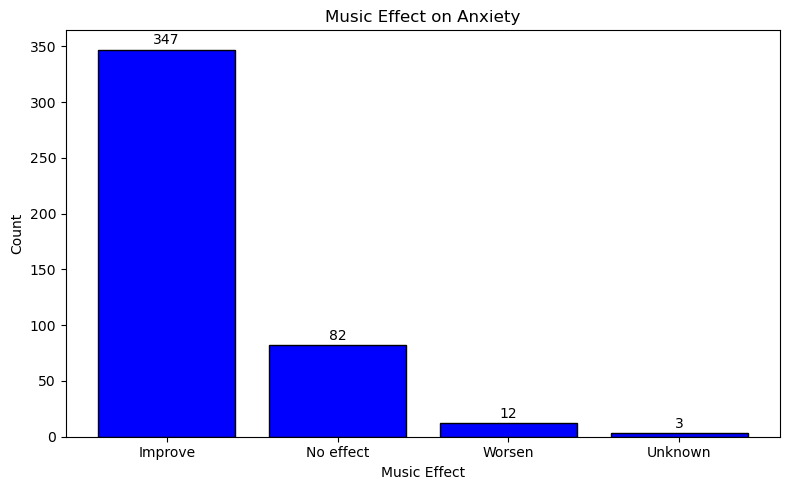

In [24]:
# Count the number of responses for each Music effect category
music_counts = df_music_help["Music effects"].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(music_counts.index, music_counts.values, color="blue", edgecolor="black")

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2, str(int(height)), ha='center', va='bottom', fontsize=10)

plt.title("Music Effect on Anxiety")
plt.xlabel("Music Effect")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## Plotting the other conditions to see the effects of music on mental health

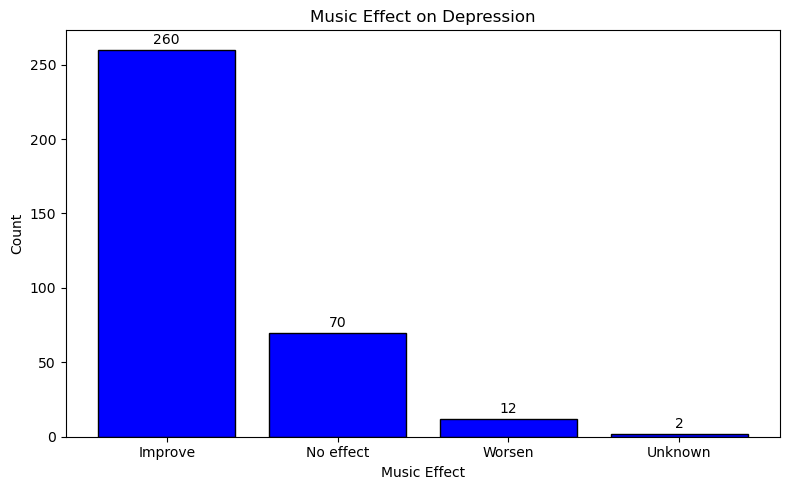

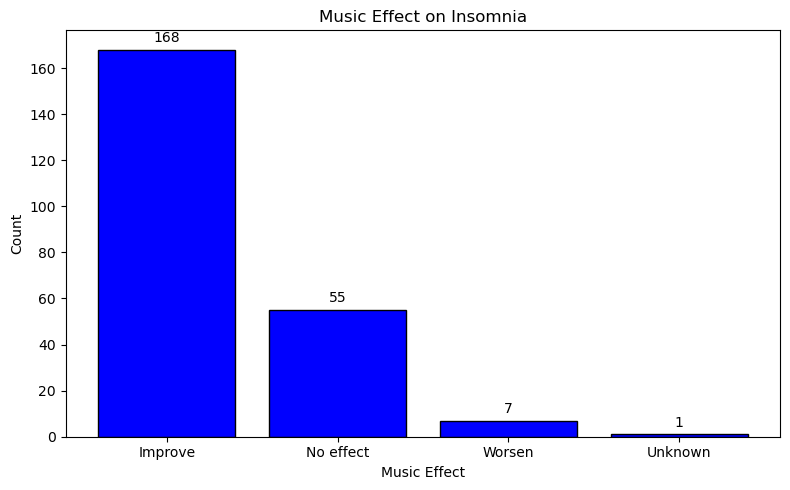

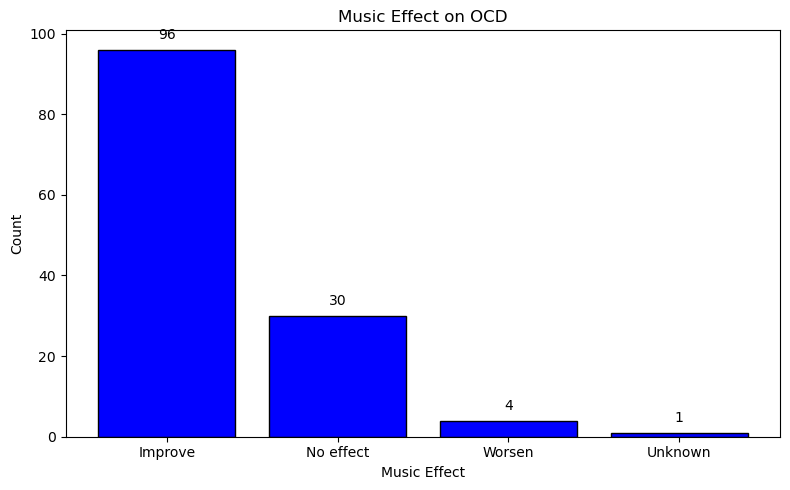

In [25]:
# Use the cleaned DataFrame
df_cleaned["Music effects"] = df_cleaned["Music effects"].fillna("Unknown")

# Conditions to plot
conditions = ["Depression", "Insomnia", "OCD"]

# Generate individual plots for each condition
for condition in conditions:
    subset = df_cleaned[df_cleaned[condition] > 5]
    counts = subset["Music effects"].value_counts().reindex(["Improve", "No effect", "Worsen", "Unknown"], fill_value=0)

    plt.figure(figsize=(8, 5))
    bars = plt.bar(counts.index, counts.values, color="blue", edgecolor="black")

    # Add labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 2, str(int(height)), ha='center', va='bottom', fontsize=10)

    plt.title(f"Music Effect on {condition}")
    plt.xlabel("Music Effect")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

## Further Research:

- Explore how different **music genres** affect various aspects of mental health.
- Compare responses across different age groups to examine whether certain music genres have a greater positive impact on specific demographics.